# Image Classification using `sklearn.svm`

In [1]:
from pathlib import Path
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, metrics
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2gray


### Load images in structured directory like it's sklearn sample dataset

In [2]:
def load_image_files(container_path, dimension=(64,64)):

    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr = "A Braille image classification dataset"
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = imread(file)
            imgray= rgb2gray(img)
            img_resized = resize(imgray, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)
    

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)



In [3]:
image_dataset = load_image_files("images/") 
print(image_dataset)

{'data': array([[0.76264553, 0.76132812, 0.76593903, ..., 0.76862745, 0.76862745,
        0.76862745],
       [0.99920726, 0.99906939, 0.99955193, ..., 1.        , 1.        ,
        1.        ],
       [0.98990119, 0.99095818, 0.98725873, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.2874349 , 0.28757276, 0.28709023, ..., 0.28627451, 0.28627451,
        0.28627451],
       [0.99528569, 0.99514782, 0.99563036, ..., 0.98815487, 0.99110371,
        0.99026118],
       [0.98141468, 0.97818244, 0.98949525, ..., 1.        , 1.        ,
        1.        ]]), 'target': array([ 0,  0,  0, ..., 25, 25, 25]), 'target_names': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'], 'images': array([[[0.76264553, 0.76132812, 0.76593903, ..., 0.76862745,
         0.76862745, 0.76862745],
        [0.76672028, 0.76380974, 0.77399663, ..., 0.76862745,
         0.76862745, 0.76862745],
        [0.7524

### Split data

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    image_dataset.data, image_dataset.target, test_size=0.2,random_state=109)

print(image_dataset.target_names)
print(X_train)


['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
[[0.96925934 0.96391314 0.98262485 ... 1.         1.         1.        ]
 [0.59576057 0.59764476 0.59105009 ... 0.6        0.6        0.6       ]
 [0.98951823 0.9886757  0.99162454 ... 1.         1.         1.        ]
 ...
 [0.848089   0.85242417 0.83725107 ... 0.85882353 0.85882353 0.85882353]
 [0.3040288  0.30899203 0.29162071 ... 0.30980392 0.30980392 0.30980392]
 [0.23148361 0.25125996 0.18204274 ... 1.         1.         1.        ]]


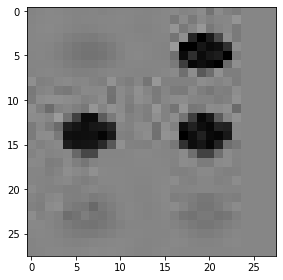

In [32]:
a = imread(r"C:\Users\HP\Desktop\SVM-Image-Classification-master\SVM-Image-Classification-master\images\J\j1.JPG3dim.jpg")

imshow(a, cmap="gray")
plt.show()

In [ ]:
a= len(X_train)
print("X train",a)
b= len(y_test)
print("Y train", b)

### Train data with parameter optimization

In [26]:
param_grid = [
  {'C': [1,10,100,1000], 'kernel': ['linear']},
  {'C': [1,10,100,1000], 'gamma': ['auto'], 'kernel': ['rbf']},
  #{'C': [1,10,50,100,500,1000], 'kernel': ['poly']},
 ]
 
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)

### Standardizing and Dimensionality reduction

In [27]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
print(X_train)
X_test = sc.transform(X_test)
print(X_test)

# Determine transformed features
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

[[ 0.53887712  0.51380448  0.59899512 ...  0.59143609  0.58881373
   0.58957159]
 [-1.02485715 -1.02431293 -1.02295067 ... -1.17667376 -1.17770988
  -1.17743219]
 [ 0.62369537  0.61779306  0.63627285 ...  0.59143609  0.58881373
   0.58957159]
 ...
 [ 0.03157099  0.04561467 -0.00315907 ... -0.03260268 -0.03466519
  -0.0340768 ]
 [-2.24625598 -2.23648905 -2.26322018 ... -2.45942011 -2.45930544
  -2.45937611]
 [-2.54998228 -2.4789307  -2.71710421 ...  0.59143609  0.58881373
   0.58957159]]
[[ 0.55915974  0.56650639  0.53927145 ...  0.59143609  0.58881373
   0.58957159]
 [-0.29885141 -0.27757655 -0.35036537 ... -0.39662529 -0.39836123
  -0.3978717 ]
 [ 0.11342301  0.10655075  0.13000964 ...  0.03673496  0.03461025
   0.03521746]
 ...
 [ 0.53518937  0.54651601  0.50556287 ...  0.59143609  0.58881373
   0.58957159]
 [ 0.57998752  0.56301652  0.61999755 ...  0.59143609  0.58881373
   0.58957159]
 [ 0.65834419  0.65608517  0.66182792 ...  0.59143609  0.58881373
   0.58957159]]


### Training the model

In [28]:
clf.fit(X_train_pca, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': ['auto'],
                          'kernel': ['rbf']}])

### Predict

In [29]:
print(y_test)
y_pred = clf.predict(X_test_pca)
print(y_pred)

[ 2  7  8  8 15 25 25  8 12  0 21 14 19 15  9 17  9 22 21 23 23  0 14  6
  3  5 24 25  8  2 12  9  2  8 19 24 23 18 17 10 25  6 16 24 19  7 23 13
 20 25 14 11 12 16 24  6 23 24 12  5 17 20 20  1  0 24  5 21  2  2  3 11
 11  5 25 10 13 19  4 10 11  0 19  5 15 25  4 10  9 19 15 25 15  6 14  6
 19 11 15 25  6 15 19 18 15  2  8 22 24  8 21  1 21 18 24  3  2 19  9 20
  1  3 18 19  7 22 20 25 14  3  5  6  9  0  4  0 15 23  6  5 12  8  4 20
 24  9  5 17 17 11 12 16  8  7 10  6 16  2 15 15 17  2 14 14 20 20  0 21
  9 12 15  0 12 19  3  2 25 18 23  3  9 22 17 12 11  0  6  2  4 13  5 25
 23  3  5 18  6 25  3 17  1 17  9  9 12  3  5 18 11  8 12 20  0 11 14 21
 11 10 14  6 10  9  2 12 25  2 18 19 23  7 10 10 25 18 22  3 15 23  8 24
  9 18  8 10 18 23 15 20 11 13 13  5  5 18 14  1  5 12 21  9 19 13  8 24
  2 11 10 23 13 23  7  4  6 12 18 17  1  5 15 21 20  5  5 16 25 22 14 21
 14 23 15 20  8 21  6 15  3 12 18 19  8 24 25 15  7 16 17  9 11 13 21  9]
[ 2  7  8  8 15 25 25  8 12  0 21 14 19  5  7 17  

### Report

In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average="weighted"))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred, average="weighted"))

print("Classification report for - \n{}:\n{}\n".format(
    clf, metrics.classification_report(y_test, y_pred)))

Accuracy: 0.8301282051282052
Precision: 0.8488398131426979
Recall: 0.8301282051282052
Classification report for - 
GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': ['auto'],
                          'kernel': ['rbf']}]):
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.71      0.83      0.77         6
           2       0.85      0.79      0.81        14
           3       1.00      0.75      0.86        12
           4       0.86      1.00      0.92         6
           5       0.59      0.76      0.67        17
           6       0.86      0.86      0.86        14
           7       0.86      0.86      0.86         7
           8       0.87      0.87      0.87        15
           9       0.83      0.94      0.88        16
          10       0.91      0.91      0.91        11
          11  

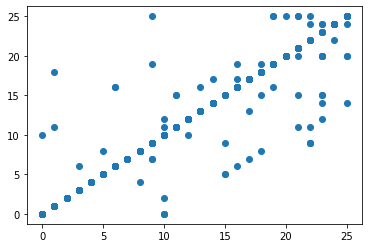

In [10]:
plt.scatter(y_test, y_pred)

In [11]:
import pandas as pd
result = pd.DataFrame({'original' : y_test,'predicted' : y_pred})
print(result)

     original  predicted
0          21         25
1          21         21
2           2          2
3           6          6
4           7          7
..        ...        ...
307        21         25
308        16          6
309        14         14
310        19         19
311         6          6

[312 rows x 2 columns]


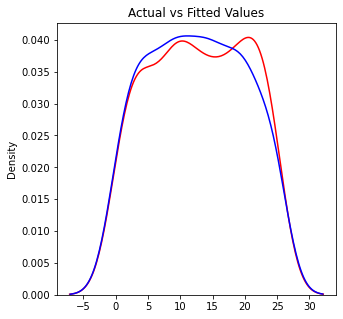

In [12]:
import seaborn as sns
plt.figure(figsize=(5, 5))
ax = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(y_pred, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values')
plt.show()
plt.close()